In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving EDA_Room_Occupancy.csv to EDA_Room_Occupancy (1).csv


In [ ]:
df= pd.read_csv("EDA_Room_Occupancy.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10808 non-null  int64  
 1   Temperature    10808 non-null  float64
 2   Humidity       10808 non-null  float64
 3   Light          10808 non-null  float64
 4   CO2            10808 non-null  float64
 5   HumidityRatio  10808 non-null  float64
 6   Occupancy      10808 non-null  int64  
 7   month          10808 non-null  int64  
 8   day            10808 non-null  int64  
 9   hour           10808 non-null  int64  
 10  minute         10808 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 928.9 KB


In [ ]:
df= df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   Occupancy      10808 non-null  int64  
 6   month          10808 non-null  int64  
 7   day            10808 non-null  int64  
 8   hour           10808 non-null  int64  
 9   minute         10808 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 844.5 KB


In [ ]:
df.shape

(10808, 10)

In [ ]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,month,day,hour,minute
count,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000
mean,20.818940,25.637117,137.494665,617.065584,0.003897,0.249907,6.076425,3.758605,11.405811,29.500093
std,1.075329,4.950347,211.099792,261.214866,0.000785,0.432979,2.297179,2.018999,7.115773,17.295696
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,2.000000,1.000000,0.000000,0.000000
25%,20.000000,21.390000,0.000000,441.000000,0.003323,0.000000,4.000000,2.000000,5.000000,15.000000
50%,20.700000,25.680000,0.000000,464.000000,0.003805,0.000000,6.000000,4.000000,11.000000,29.000000
75%,21.500000,28.324167,413.541667,761.000000,0.004372,0.000000,8.000000,6.000000,18.000000,44.000000
max,23.750000,38.725417,1033.854167,1241.000000,0.005945,1.000000,10.000000,7.000000,23.000000,59.000000


**# LOGISTIC REGRESSION**

In [ ]:
df1= df[:]

In [ ]:
X = df1.loc[:, df1.columns!= 'Occupancy']
y = df1.loc[:, df1.columns== 'Occupancy']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   month          10808 non-null  int64  
 6   day            10808 non-null  int64  
 7   hour           10808 non-null  int64  
 8   minute         10808 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 760.1 KB


In [ ]:
y

,Occupancy
0,1
1,1
2,1
3,1
4,1
...,...
10803,1
10804,1
10805,1
10806,1


In [ ]:
''' Splitting the data into Train & Test (70-30 respectively) '''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
train = X_train.join(y_train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 5519 to 2732
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    7565 non-null   float64
 1   Humidity       7565 non-null   float64
 2   Light          7565 non-null   float64
 3   CO2            7565 non-null   float64
 4   HumidityRatio  7565 non-null   float64
 5   month          7565 non-null   int64  
 6   day            7565 non-null   int64  
 7   hour           7565 non-null   int64  
 8   minute         7565 non-null   int64  
 9   Occupancy      7565 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 970.1 KB


In [ ]:
no_Occupancy = train[train.Occupancy == 0] 
len(no_Occupancy)

5718

In [ ]:
yes_Occupancy = train[train.Occupancy == 1] 
len(yes_Occupancy)

1847

In [ ]:
from sklearn.utils import resample

In [ ]:
# Smote is done - over sampling
yes_Occupancy_os = resample(yes_Occupancy,
                          replace = True, 
                          n_samples = len(no_Occupancy),
                          random_state = 14)

In [ ]:
train_os = pd.concat([yes_Occupancy_os, no_Occupancy])

In [ ]:
train_os.Occupancy.value_counts()

1    5718
0    5718
Name: Occupancy, dtype: int64

In [ ]:
X_train_os = train_os.loc[:, train_os.columns != 'Occupancy']
y_train_os = train_os.loc[:, train_os.columns == 'Occupancy']

**#Recurrsive Feature Elimination**

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=10000000)

In [ ]:
rfe = RFE(logreg, n_features_to_select=6)

In [ ]:
rfe = rfe.fit(X_train_os, y_train_os.values.ravel())

In [ ]:
rfe.n_features_to_select

6

In [ ]:
X_train_os.columns[rfe.get_support()]

Index(['Temperature', 'Humidity', 'Light', 'month', 'day', 'minute'], dtype='object')

In [ ]:
cols = X_train_os.columns[rfe.get_support()]

In [ ]:
cols.to_list()

['Temperature', 'Humidity', 'Light', 'month', 'day', 'minute']

**#Logistic Model by statistic apporach**

In [ ]:
#________________________________sm model to see p_values 
x1 = X_train_os[cols] 

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11436 entries, 2601 to 2732
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  11436 non-null  float64
 1   Humidity     11436 non-null  float64
 2   Light        11436 non-null  float64
 3   month        11436 non-null  int64  
 4   day          11436 non-null  int64  
 5   minute       11436 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 625.4 KB


In [ ]:
y_train_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11436 entries, 2601 to 2732
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Occupancy  11436 non-null  int64
dtypes: int64(1)
memory usage: 178.7 KB


In [ ]:
y_train_os.value_counts()

Occupancy
1            5718
0            5718
dtype: int64

In [ ]:
y1 = y_train_os

In [ ]:
y1

,Occupancy
2601,1
2556,1
5484,1
9707,1
5333,1
...,...
7891,0
9225,0
4859,0
3264,0


In [ ]:
#____________Stats model
import statsmodels.api as sm

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11436 entries, 2601 to 2732
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  11436 non-null  float64
 1   Humidity     11436 non-null  float64
 2   Light        11436 non-null  float64
 3   month        11436 non-null  int64  
 4   day          11436 non-null  int64  
 5   minute       11436 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 625.4 KB


In [ ]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11436 entries, 2601 to 2732
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Occupancy  11436 non-null  int64
dtypes: int64(1)
memory usage: 178.7 KB


In [ ]:
logit_model = sm.Logit(y1,x1)

In [ ]:
result = logit_model.fit(method='bfgs')

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.057369
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 40


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.917    
Dependent Variable: Occupancy        AIC:              1324.1428
Date:               2021-12-15 10:16 BIC:              1368.2099
No. Observations:   11436            Log-Likelihood:   -656.07  
Df Model:           5                LL-Null:          -7926.8  
Df Residuals:       11430            LLR p-value:      0.0000   
Converged:          0.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Temperature     -0.5383   0.0337 -15.9693 0.0000 -0.6043 -0.4722
Humidity         0.2309   0.0206  11.2104 0.0000  0.1906  0.2713
Light            0.0257   0.0009  28.2780 0.0000  0.0240  0.0275
month           -0.0981   0.0512  -1.9169 0.0553 -0.1984  0.0022
day             -0.3191   0.0437  -7.3038 0.0000 -

**#Logistic model by SK learn method**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logreg= LogisticRegression(solver= 'sag')
logreg.fit(x1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

In [ ]:
## X_test should alsso have only 2 columns
X_test2= X_test[cols]

In [ ]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3243 entries, 5862 to 3981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3243 non-null   float64
 1   Humidity     3243 non-null   float64
 2   Light        3243 non-null   float64
 3   month        3243 non-null   int64  
 4   day          3243 non-null   int64  
 5   minute       3243 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 177.4 KB


In [ ]:
y_pred= logreg.predict(X_test2)

In [ ]:
log_score= logreg.score(X_test2, y_test)

In [ ]:
print("Accuracy of logistic regression classifier on test data:{}".format(log_score))

Accuracy of logistic regression classifier on test data:0.9821153253160654


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2333   56]
 [   2  852]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2389
           1       0.94      1.00      0.97       854

    accuracy                           0.98      3243
   macro avg       0.97      0.99      0.98      3243
weighted avg       0.98      0.98      0.98      3243



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test2))
logit_roc_auc

0.9871086547142788

In [ ]:
""  Area under curve is 0.987   ""

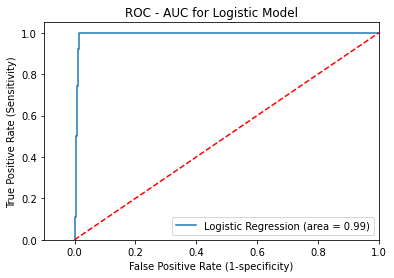

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC - AUC for Logistic Model')
plt.legend(loc="lower right")
plt.show()

**# DECISION TREE**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   Occupancy      10808 non-null  int64  
 6   month          10808 non-null  int64  
 7   day            10808 non-null  int64  
 8   hour           10808 non-null  int64  
 9   minute         10808 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 844.5 KB


In [ ]:
X_train_os = train_os.loc[:, train_os.columns != 'Occupancy']
y_train_os = train_os.loc[:, train_os.columns == 'Occupancy']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   month          10808 non-null  int64  
 6   day            10808 non-null  int64  
 7   hour           10808 non-null  int64  
 8   minute         10808 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 760.1 KB


In [ ]:
y

,Occupancy
0,1
1,1
2,1
3,1
4,1
...,...
10803,1
10804,1
10805,1
10806,1


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fit tree on train data
#model
clf = DecisionTreeClassifier()

In [ ]:
#Fit Classifier model on train set 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predict/estimate_train  X_train
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_train

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
#Predict/estimate_test  X_test
y_pred_test = clf.predict(X_test)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#See the train 
from sklearn import tree

[Text(98.3426674364896, 211.4, 'X[2] <= 365.125\ngini = 0.369\nsamples = 7565\nvalue = [5718, 1847]'),
 Text(46.392609699769054, 199.32, 'X[1] <= 37.718\ngini = 0.004\nsamples = 5623\nvalue = [5613, 10]'),
 Text(40.20692840646651, 187.24, 'X[2] <= 289.25\ngini = 0.003\nsamples = 5621\nvalue = [5613, 8]'),
 Text(24.74272517321016, 175.16, 'X[3] <= 1238.833\ngini = 0.001\nsamples = 5510\nvalue = [5508, 2]'),
 Text(12.37136258660508, 163.07999999999998, 'X[2] <= 212.0\ngini = 0.0\nsamples = 5464\nvalue = [5463, 1]'),
 Text(6.18568129330254, 151.0, 'gini = 0.0\nsamples = 5391\nvalue = [5391, 0]'),
 Text(18.55704387990762, 151.0, 'X[2] <= 213.875\ngini = 0.027\nsamples = 73\nvalue = [72, 1]'),
 Text(12.37136258660508, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(24.74272517321016, 138.92000000000002, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]'),
 Text(37.11408775981524, 163.07999999999998, 'X[1] <= 33.256\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(30.9284

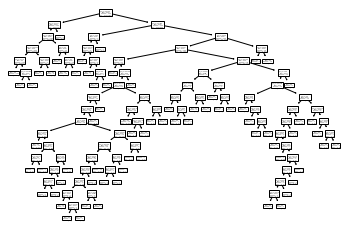

In [ ]:
tree.plot_tree(clf.fit(X_train, y_train))

In [ ]:
#Model has learnt unneccesaary things 
#Need to optimize

from sklearn.metrics import accuracy_score

In [ ]:
print(round(accuracy_score(y_train,y_pred_train), 2))

1.0


In [ ]:
print(round(accuracy_score(y_test,y_pred_test), 2))

0.99


In [ ]:
# Accuracy of train data is 1.0
# Accuracy of test data is 0.99

In [ ]:
from sklearn import tree

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
path

{'ccp_alphas': array([0.00000000e+00, 8.70504409e-05, 8.76048094e-05, 1.18968936e-04,
        1.22019421e-04, 1.30214756e-04, 1.31574307e-04, 1.32139726e-04,
        1.76250275e-04, 1.94676441e-04, 1.98281560e-04, 1.98281560e-04,
        1.98281560e-04, 2.48526821e-04, 2.54207128e-04, 2.61881305e-04,
        2.64029824e-04, 2.68745749e-04, 2.86406698e-04, 3.78537523e-04,
        3.90462149e-04, 4.11250643e-04, 4.14588716e-04, 4.19196841e-04,
        4.81540931e-04, 4.95490255e-04, 5.75750900e-04, 6.15867402e-04,
        6.16204081e-04, 7.41353990e-04, 1.07405358e-03, 1.30731210e-03,
        1.71280287e-03, 3.40184690e-01]),
 'impurities': array([0.00000000e+00, 2.61151323e-04, 5.23965751e-04, 7.61903623e-04,
        1.00594247e-03, 1.26637198e-03, 1.79266920e-03, 2.32122810e-03,
        2.49747838e-03, 2.69215482e-03, 2.89043638e-03, 3.08871794e-03,
        3.28699950e-03, 4.03257996e-03, 4.28678709e-03, 4.54866840e-03,
        4.81269822e-03, 5.35018972e-03, 5.63659642e-03, 6.01513394

In [ ]:
alphas = path['ccp_alphas']

In [ ]:
alphas

array([0.00000000e+00, 8.70504409e-05, 8.76048094e-05, 1.18968936e-04,
       1.22019421e-04, 1.30214756e-04, 1.31574307e-04, 1.32139726e-04,
       1.76250275e-04, 1.94676441e-04, 1.98281560e-04, 1.98281560e-04,
       1.98281560e-04, 2.48526821e-04, 2.54207128e-04, 2.61881305e-04,
       2.64029824e-04, 2.68745749e-04, 2.86406698e-04, 3.78537523e-04,
       3.90462149e-04, 4.11250643e-04, 4.14588716e-04, 4.19196841e-04,
       4.81540931e-04, 4.95490255e-04, 5.75750900e-04, 6.15867402e-04,
       6.16204081e-04, 7.41353990e-04, 1.07405358e-03, 1.30731210e-03,
       1.71280287e-03, 3.40184690e-01])

In [ ]:
acrcy_train, acrcy_test = [],[]

for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)    
    
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    acrcy_train.append(accuracy_score(y_train, y_pred_train))
    acrcy_test.append(accuracy_score(y_test,y_pred_test))

In [ ]:
acrcy_train

[1.0,
 0.9998678122934567,
 0.9997356245869135,
 0.9996034368803701,
 0.9994712491738268,
 0.9993390614672836,
 0.9990746860541969,
 0.9988103106411104,
 0.998678122934567,
 0.9985459352280238,
 0.9981493721083939,
 0.9981493721083939,
 0.9981493721083939,
 0.9977528089887641,
 0.9976206212822207,
 0.9974884335756775,
 0.9973562458691342,
 0.9970918704560476,
 0.9969596827495043,
 0.9966953073364178,
 0.9964309319233311,
 0.9961665565102445,
 0.9949768671513549,
 0.9924653007270324,
 0.9922009253139458,
 0.9919365499008592,
 0.9912756113681428,
 0.9911434236615995,
 0.9902181097157964,
 0.9892927957699934,
 0.9881031064111038,
 0.9865168539325843,
 0.9847984137475215,
 0.7558493060145407]

In [ ]:
acrcy_test

[0.9919827320382362,
 0.9910576626580326,
 0.9913660191181005,
 0.9907493061979649,
 0.9913660191181005,
 0.9907493061979649,
 0.9916743755781684,
 0.992291088498304,
 0.992291088498304,
 0.9919827320382362,
 0.9919827320382362,
 0.9916743755781684,
 0.9919827320382362,
 0.9916743755781684,
 0.9913660191181005,
 0.9913660191181005,
 0.9910576626580326,
 0.9910576626580326,
 0.9910576626580326,
 0.9910576626580326,
 0.9901325932778292,
 0.9901325932778292,
 0.9898242368177613,
 0.990440949737897,
 0.9898242368177613,
 0.9907493061979649,
 0.9892075238976257,
 0.9892075238976257,
 0.9892075238976257,
 0.9879740980573543,
 0.9876657415972865,
 0.9845821769966081,
 0.9873573851372186,
 0.736663583102066]

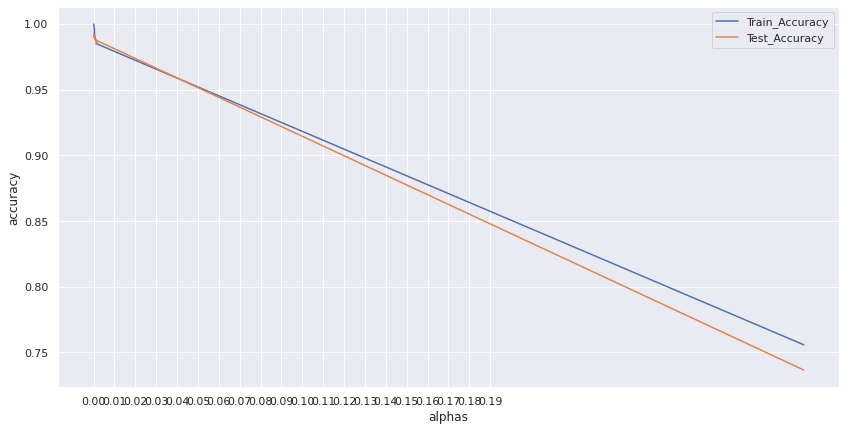

In [ ]:
# now we have scores
# lets, plot

sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y =acrcy_train, x = alphas, label = 'Train_Accuracy')
sns.lineplot(y =acrcy_test, x = alphas, label = 'Test_Accuracy')
plt.xticks(ticks=np.arange(0.00,0.2,0.01))
plt.xlabel('alphas')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#_________with ccp = 0.04
clf = DecisionTreeClassifier(ccp_alpha=0.04, random_state = 14)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, random_state=14)

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_train,y_pred_train), 2))

0.98


In [ ]:
print(round(accuracy_score(y_test,y_pred_test), 2))

0.99


In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[2350   39]
 [   2  852]]


In [ ]:
### Classification Report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2389
           1       0.96      1.00      0.98       854

    accuracy                           0.99      3243
   macro avg       0.98      0.99      0.98      3243
weighted avg       0.99      0.99      0.99      3243



In [ ]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
predictedProbability = clf.predict_proba(X_test)[:, 1]
fpr,tpr, thresholds = metrics.roc_curve(y_test, predictedProbability)

In [ ]:
fpr

array([0.        , 0.01632482, 1.        ])

In [ ]:
tpr

array([0.        , 0.99765808, 1.        ])

In [ ]:
thresholds

array([1.94593203e+00, 9.45932029e-01, 1.77841010e-03])

In [ ]:
dff = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc = auc(fpr,tpr)
auc

0.9906666287619976

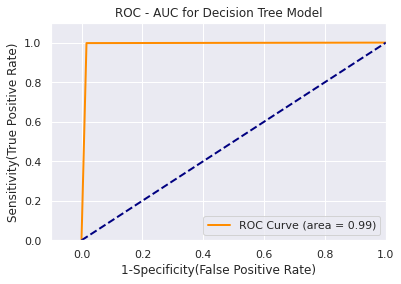

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC - AUC for Decision Tree Model")
plt.legend(loc = "lower right")
plt.show()

**# RANDOM FOREST**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   Occupancy      10808 non-null  int64  
 6   month          10808 non-null  int64  
 7   day            10808 non-null  int64  
 8   hour           10808 non-null  int64  
 9   minute         10808 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 844.5 KB


In [ ]:
X_train_os = train_os.loc[:, train_os.columns != 'Occupancy']
y_train_os = train_os.loc[:, train_os.columns == 'Occupancy']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   month          10808 non-null  int64  
 6   day            10808 non-null  int64  
 7   hour           10808 non-null  int64  
 8   minute         10808 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 760.1 KB


In [ ]:
y

,Occupancy
0,1
1,1
2,1
3,1
4,1
...,...
10803,1
10804,1
10805,1
10806,1


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create Classifier object 
#in our previous experiment, we found ccp_alphas = 0.04 has the best accuarcy 
clf_rf = RandomForestClassifier(n_estimators =100, ccp_alpha= 0.04, random_state = 14)

In [ ]:
#fit the classifier with x and y  data = train
mod_rf = clf_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
#Prediction 
y_train_pred = mod_rf.predict(X_train)
y_train_pred

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
#Prediction 
y_test_pred = mod_rf.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2))

0.98


In [ ]:
print(round(accuracy_score(y_test,y_test_pred), 2))

0.98


In [ ]:
#_____________________________ Extract Feature Importance 
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': mod_rf.feature_importances_}).\
    sort_values('importance', ascending = False)

In [ ]:
fi.head()

,feature,importance
2,Light,0.511094
3,CO2,0.304064
0,Temperature,0.089617
7,hour,0.057141
4,HumidityRatio,0.027836


In [ ]:
# Accuarcy 2 cells above is 0.98 & 0.98 for Train & test (respectively)
# This accuracy is for having all columns as features in our model
# Lets build a model keeping 2 best features 
# that is keeping 'Light' , 'CO2' only
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create Classifier object 
#in our previous experiment Decision Tree model, 
#we found ccp_alphas = 0.035 has the best accuarcy 
clf_rf1 = RandomForestClassifier(n_estimators =100, ccp_alpha= 0.04, random_state = 14)

In [ ]:
# fit the classifier with x and y data=TRAIN, 
#this time with Failure_Type only
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 5519 to 2732
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    7565 non-null   float64
 1   Humidity       7565 non-null   float64
 2   Light          7565 non-null   float64
 3   CO2            7565 non-null   float64
 4   HumidityRatio  7565 non-null   float64
 5   month          7565 non-null   int64  
 6   day            7565 non-null   int64  
 7   hour           7565 non-null   int64  
 8   minute         7565 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 591.0 KB


In [ ]:
X_train1 = X_train.iloc[ : ,[2,3]]
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 5519 to 2732
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Light   7565 non-null   float64
 1   CO2     7565 non-null   float64
dtypes: float64(2)
memory usage: 177.3 KB


In [ ]:
mod_rf1 = clf_rf1.fit(X_train1, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
#Prediction 
y_train_pred1 = mod_rf1.predict(X_train1)
y_train_pred1

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3243 entries, 5862 to 3981
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    3243 non-null   float64
 1   Humidity       3243 non-null   float64
 2   Light          3243 non-null   float64
 3   CO2            3243 non-null   float64
 4   HumidityRatio  3243 non-null   float64
 5   month          3243 non-null   int64  
 6   day            3243 non-null   int64  
 7   hour           3243 non-null   int64  
 8   minute         3243 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 253.4 KB


In [ ]:
X_test1 = X_test.iloc[ : ,[2,3]]
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3243 entries, 5862 to 3981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Light   3243 non-null   float64
 1   CO2     3243 non-null   float64
dtypes: float64(2)
memory usage: 76.0 KB


In [ ]:
#Prediction 
y_test_pred1 = mod_rf1.predict(X_test1)
y_test_pred1

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(round(accuracy_score(y_train,y_train_pred1), 2))

0.98


In [ ]:
print(round(accuracy_score(y_test,y_test_pred1), 2))

0.99


In [ ]:
### There is no much difference in accuarcy 
#Earlier train accuracy = 0.98 now with 2 features its 0.98
#Earlier test accuracy = 0.98 now with 2 features its 0.98

In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_pred1)
print(confusion_matrix)

[[2349   40]
 [   5  849]]


In [ ]:
### Classification Report
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2389
           1       0.96      0.99      0.97       854

    accuracy                           0.99      3243
   macro avg       0.98      0.99      0.98      3243
weighted avg       0.99      0.99      0.99      3243



In [ ]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
predictedProbability1 = mod_rf1.predict_proba(X_test1)[:, 1]
fpr,tpr, thresholds = metrics.roc_curve(y_test, predictedProbability1)

In [ ]:
fpr

array([0.00000000e+00, 4.18585182e-04, 1.17203851e-02, 1.21389703e-02,
       1.21389703e-02, 1.21389703e-02, 1.21389703e-02, 1.25575555e-02,
       1.25575555e-02, 1.25575555e-02, 1.29761406e-02, 1.29761406e-02,
       1.29761406e-02, 1.29761406e-02, 1.29761406e-02, 1.29761406e-02,
       1.29761406e-02, 1.63248221e-02, 1.67434073e-02, 1.67434073e-02,
       1.67434073e-02, 7.07408958e-02, 7.86940142e-02, 7.99497698e-02,
       8.37170364e-02, 9.20887401e-02, 9.54374215e-02, 1.02134784e-01,
       1.03809125e-01, 1.04646296e-01, 1.09669318e-01, 1.12599414e-01,
       1.14692340e-01, 1.15529510e-01, 1.17203851e-01, 1.18459607e-01,
       1.19296777e-01, 1.20133947e-01, 1.23064044e-01, 1.00000000e+00])

In [ ]:
tpr

array([0.        , 0.01639344, 0.85362998, 0.85831382, 0.8618267 ,
       0.87002342, 0.88173302, 0.8969555 , 0.90046838, 0.90163934,
       0.91100703, 0.91569087, 0.92271663, 0.92505855, 0.92857143,
       0.93091335, 0.93325527, 0.9941452 , 0.9941452 , 0.99765808,
       0.99882904, 0.99882904, 0.99882904, 0.99882904, 0.99882904,
       0.99882904, 0.99882904, 0.99882904, 0.99882904, 0.99882904,
       0.99882904, 0.99882904, 0.99882904, 0.99882904, 0.99882904,
       0.99882904, 0.99882904, 0.99882904, 0.99882904, 1.        ])

In [ ]:
thresholds

array([1.88230225, 0.88230225, 0.8814641 , 0.87484168, 0.87408866,
       0.86628095, 0.8655035 , 0.85796363, 0.85055406, 0.84318438,
       0.83853817, 0.82930016, 0.82196696, 0.71072826, 0.6441427 ,
       0.63684772, 0.52635246, 0.50996269, 0.50362834, 0.48223706,
       0.40743401, 0.27606965, 0.26777633, 0.26011641, 0.25196408,
       0.24428268, 0.24428079, 0.2367428 , 0.22933324, 0.19969356,
       0.19942138, 0.19236036, 0.09237772, 0.08565025, 0.08508274,
       0.05023504, 0.02462451, 0.02221881, 0.02202243, 0.01513416])

In [ ]:
dff1 = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc1 = auc(fpr,tpr)
auc1

0.9922917097587204

In [ ]:
''' Area Under Curve is 0.99 '''

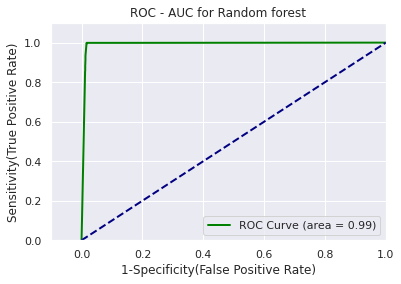

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'green',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc1)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC - AUC for Random forest")
plt.legend(loc = "lower right")
plt.show()

**# GRADIENT BOOSTING MODEL**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   Occupancy      10808 non-null  int64  
 6   month          10808 non-null  int64  
 7   day            10808 non-null  int64  
 8   hour           10808 non-null  int64  
 9   minute         10808 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 844.5 KB


In [ ]:
X_train_os = train_os.loc[:, train_os.columns != 'Occupancy']
y_train_os = train_os.loc[:, train_os.columns == 'Occupancy']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   month          10808 non-null  int64  
 6   day            10808 non-null  int64  
 7   hour           10808 non-null  int64  
 8   minute         10808 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 760.1 KB


In [ ]:
y

,Occupancy
0,1
1,1
2,1
3,1
4,1
...,...
10803,1
10804,1
10805,1
10806,1


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
GB = GradientBoostingClassifier()

In [ ]:
GB_mod = GB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Prediction
y_train_GB = GB_mod.predict(X_train)
y_train_GB

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
# Prediction
y_test_GB = GB_mod.predict(X_test)
y_test_GB

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print(round(accuracy_score(y_train, y_train_GB), 2))

0.99


In [ ]:
print(round(accuracy_score(y_test, y_test_GB), 2))

0.99


In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_GB)
print(confusion_matrix)

[[2368   21]
 [   6  848]]


In [ ]:
### Classification Report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_GB))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2389
           1       0.98      0.99      0.98       854

    accuracy                           0.99      3243
   macro avg       0.99      0.99      0.99      3243
weighted avg       0.99      0.99      0.99      3243



**# KNOWING YOUR NEAREST NEIGHBORS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   Occupancy      10808 non-null  int64  
 6   month          10808 non-null  int64  
 7   day            10808 non-null  int64  
 8   hour           10808 non-null  int64  
 9   minute         10808 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 844.5 KB


In [ ]:
X_train_os = train_os.loc[:, train_os.columns != 'Occupancy']
y_train_os = train_os.loc[:, train_os.columns == 'Occupancy']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10808 non-null  float64
 1   Humidity       10808 non-null  float64
 2   Light          10808 non-null  float64
 3   CO2            10808 non-null  float64
 4   HumidityRatio  10808 non-null  float64
 5   month          10808 non-null  int64  
 6   day            10808 non-null  int64  
 7   hour           10808 non-null  int64  
 8   minute         10808 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 760.1 KB


In [ ]:
y

,Occupancy
0,1
1,1
2,1
3,1
4,1
...,...
10803,1
10804,1
10805,1
10806,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Building Model @ n_neighbors = 6

knn = KNeighborsClassifier(n_neighbors = 6)
print(knn) 
mpm_knn = knn.fit(X_train, y_train) 
print(mpm_knn)

KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=6)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Applying on Test data for prediction
y_pred_KNN = mpm_knn.predict(X_test)
print(y_pred_KNN)

[0 0 0 ... 1 0 1]


In [ ]:
#Prediction Score
mpm_knn.score(X_test, y_test)

0.9870490286771508

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_KNN) 

0.9870490286771508

In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[2367,   22],
       [  20,  834]])

In [ ]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2389
           1       0.97      0.98      0.98       854

    accuracy                           0.99      3243
   macro avg       0.98      0.98      0.98      3243
weighted avg       0.99      0.99      0.99      3243

